In [10]:
#Loading the dataset and importing relevant libraries
import pandas as pd
sales_df=pd.read_csv('advertising_and_sales_clean.csv')
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


In [11]:
#Split the dataset into features and targets
x=sales_df['radio'].values
x

array([ 6566.23,  9237.76, 15886.45, ..., 19800.07, 17534.64, 15966.69])

In [12]:
#Resahpe x
x=x.reshape(-1,1)
x

array([[ 6566.23],
       [ 9237.76],
       [15886.45],
       ...,
       [19800.07],
       [17534.64],
       [15966.69]])

In [13]:
#Targets
y=sales_df['sales'].values
y

array([ 54732.76,  46677.9 , 150177.83, ..., 163631.46, 253610.41,
       148202.41])

In [14]:
#Sahpe of x and y
print(x.shape,y.shape)

(4546, 1) (4546,)


In [16]:
#Spliting into training and testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
#Building the model
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [19]:
#Make predictions
y_pred=lin_reg.predict(x_test)

#Print the first five predictions
print(f'First five predictions: {y_pred[:5]}')

First five predictions: [ 69001.80592927 104540.47870858 210114.18380293 208097.80401628
 304889.9864972 ]


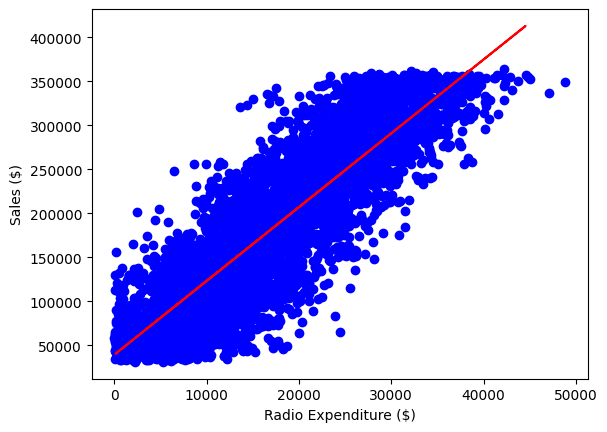

In [24]:
#Making visualization
import matplotlib.pyplot as plt

#Creating a scatter plot
plt.scatter(x,y,color='b')

# Create line plot
plt.plot(x_test,y_pred, color="r")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")
plt.show()